In [2]:
from scipy.stats import bernoulli

# Task 1
Reproduce Figure 1 from (Candès et al. 2018). [20 points]

Use this version of the paper: https://arxiv.org/abs/1610.02351.

## Figure 1 - left part

In [5]:
#GitHub Copilot code:

import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

# Set the AR coefficient
ar_coefficient = 0.5
p = 200

# Generate the AR(1) time series
ar_process = ArmaProcess(ar=[1, -ar_coefficient])
time_series = ar_process.generate_sample(nsample=p)

# Print the time series
print(time_series)

[ 8.24153079e-01  1.31534574e+00  6.17964517e-01  6.35853527e-01
  6.75984797e-01 -1.00513183e+00  1.09879872e+00 -1.16735351e+00
 -4.27046681e-01 -6.19428988e-01  3.93354911e-01 -1.32866606e+00
 -2.20168918e+00 -1.10772929e+00 -1.82108127e+00 -2.12674134e+00
 -1.05444895e+00 -3.35284451e+00 -2.42762918e+00 -1.34594246e+00
 -1.33882781e+00  1.28104485e+00  1.31802427e+00 -1.07318299e+00
 -1.48697249e+00  4.82012252e-02  7.71607679e-01  1.03314447e+00
  2.35515315e+00  4.02940103e-01  6.11693203e-01 -2.89078805e-02
  8.24156982e-01  8.26407858e-01  1.44424454e+00  2.33998015e+00
  2.42185956e+00  5.61320213e-01  1.57070654e+00  1.16616170e+00
  6.42464503e-02  6.32924188e-01  1.82606372e-01 -7.11048092e-01
 -6.67704471e-01 -1.66565755e+00 -2.88484303e+00 -2.52265906e+00
 -1.34849947e+00  1.67425901e-02  2.27294350e+00  2.38050724e+00
  1.25154891e+00  2.96756099e+00  3.64124282e+00  2.50535445e+00
  2.30314240e+00  1.17678898e+00  1.82126519e+00  2.00704269e+00
  2.23540112e-01  6.78477

In [3]:
replications = 10000
n = 500
p = 200

In [4]:
bernoulli.rvs(p=0.5, size=n)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
import numpy as np
from scipy.stats import bernoulli

# Set the AR coefficient
ar_coefficient = 0.5
p = 200

# Generate the AR(1) time series
ar_process = ArmaProcess(ar=[1, -ar_coefficient])
time_series = ar_process.generate_sample(nsample=p)

# Simulate the independent design matrices
design_matrices = np.random.choice([0, 1], size=(replications, n, p), p=[0.5, 0.5])

# Simulate the binary responses
binary_responses = bernoulli.rvs(p=0.5, size=(replications, n))

# Print the simulated data
print("Design Matrices:")
print(design_matrices)
print("Binary Responses:")
print(binary_responses)


100%|██████████| 10000/10000 [04:57<00:00, 33.60it/s]


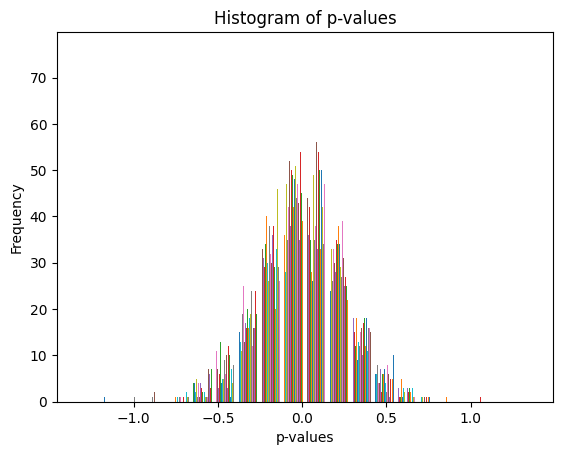

In [1]:
from scipy.stats import bernoulli
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.arima_process import ArmaProcess
from tqdm import tqdm

# Set the AR coefficient
ar_coefficient = 0.5
p = 200
n = 500
replications = 10000

# Calculate the p-values for each run
p_values = []
for i in tqdm(range(replications)):
    # Generate the AR(1) time series
    ar_process = ArmaProcess(ar=[1, -ar_coefficient])

    X = []
    for j in range(n):
        time_series = ar_process.generate_sample(nsample=p)
        X.append(time_series)

    y = bernoulli.rvs(p=0.5, size=n)

    model = LogisticRegression()
    model.fit(X, y)
    p_values.append(model.coef_[0])

# Show a histogram of the p-values
import matplotlib.pyplot as plt
plt.hist(p_values, bins=20) #paper has 20 bins
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()


Based of: https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance

In [2]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

# test p-values
x = np.arange(10)[:, np.newaxis]
y = np.array([0,0,0,1,0,0,1,1,1,1])
model = LogisticRegression(C=1e30).fit(x, y)
print(logit_pvalue(model, x))

# compare with statsmodels
import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(x)).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()

[0.11413171 0.08780382]
[0.11413093 0.08779979]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                  0.4856
Time:                        21:55:30   Log-Likelihood:                -3.5656
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                  0.009472
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9587      2.506     -1.580      0.114      -8.870       0.952
x1             0.8797      0.515      1.707      0.088      -0.130       1.890
==============================================================================
"""

In [4]:
from scipy.stats import bernoulli
#from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.arima_process import ArmaProcess
from tqdm import tqdm
import statsmodels.api as sm

# Set the AR coefficient
ar_coefficient = 0.5
p = 200
n = 500
replications = 10000

# Calculate the p-values for each run
p_values = []
for i in tqdm(range(replications)):
    # Generate the AR(1) time series
    ar_process = ArmaProcess(ar=[1, -ar_coefficient])

    X = []
    for j in range(n):
        time_series = ar_process.generate_sample(nsample=p)
        X.append(time_series)

    y = bernoulli.rvs(p=0.5, size=n)

    sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
    #print(sm_model.pvalues)
    p_value = np.average(sm_model.pvalues)
    p_values.append(p_value)

# Show a histogram of the p-values
import matplotlib.pyplot as plt
plt.hist(p_values, bins=20) #paper has 20 bins
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()


  1%|          | 58/10000 [00:10<30:02,  5.52it/s]


KeyboardInterrupt: 

100%|██████████| 10000/10000 [26:01<00:00,  6.40it/s] 


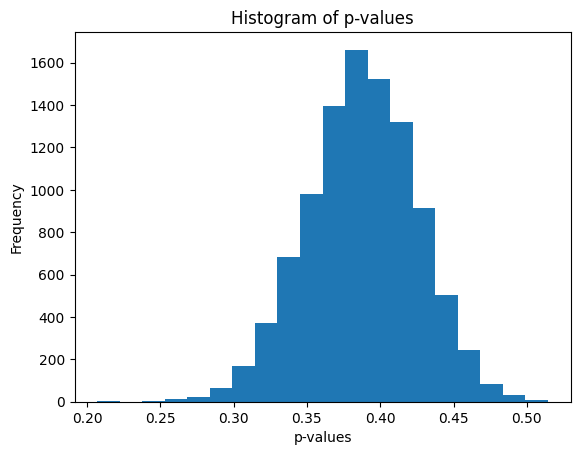

In [1]:
from scipy.stats import bernoulli
from statsmodels.tsa.arima_process import ArmaProcess
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
import numpy as np


# Set the AR coefficient
ar_coefficient = 0.5
p = 200
n = 500
replications = 10000

# Calculate the p-values for each run
p_values = []
for i in tqdm(range(replications)):
    # Generate the AR(1) time series
    ar_process = ArmaProcess(ar=[1, -ar_coefficient])

    X = []
    for j in range(n):
        time_series = ar_process.generate_sample(nsample=p)
        X.append(time_series)

    y = bernoulli.rvs(p=0.5, size=n)

    #sm_model = Logit(y, X).fit(disp=0) #like 1h?
    sm_model = Logit(y, add_constant(X)).fit(disp=0) #like 30min
    #print(sm_model.pvalues)
    p_value = np.average(sm_model.pvalues)
    p_values.append(p_value)

# Show a histogram of the p-values
plt.hist(p_values, bins=20) #paper has 20 bins
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.title('Histogram of p-values')
plt.show()